<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_lab_5_2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from spacy.matcher import Matcher


In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/arxiv_data.csv")

# Display basic info
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [5]:
# Optional filtering if subject column exists
# Example:
# df = df[df['categories'].str.contains('cs.AI', na=False)]

abstracts = df['summaries'].dropna().head(200)  # limit for performance

In [6]:
nlp = spacy.load("en_core_web_sm")


In [7]:
docs = list(nlp.pipe(abstracts))


In [8]:
tokens = []
for doc in docs:
    tokens.extend([token.text for token in doc if not token.is_punct])

tokens[:30]


['Stereo',
 'matching',
 'is',
 'one',
 'of',
 'the',
 'widely',
 'used',
 'techniques',
 'for',
 'inferring',
 'depth',
 'from',
 '\n',
 'stereo',
 'images',
 'owing',
 'to',
 'its',
 'robustness',
 'and',
 'speed',
 'It',
 'has',
 'become',
 'one',
 'of',
 'the',
 'major',
 '\n']

In [9]:
noun_phrases = []

for doc in docs:
    noun_phrases.extend([chunk.text.lower() for chunk in doc.noun_chunks])

np_freq = Counter(noun_phrases)
top_nps = np_freq.most_common(15)

top_nps


[('we', 540),
 ('which', 172),
 ('that', 144),
 ('it', 120),
 ('this paper', 74),
 ('the-art', 72),
 ('our method', 50),
 ('image segmentation', 47),
 ('this work', 47),
 ('medical image segmentation', 37),
 ('this', 30),
 ('semantic segmentation', 29),
 ('-', 27),
 ('training', 26),
 ('the performance', 26)]

In [10]:
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

entity_freq = Counter(entities)
entity_freq


Counter({'DATE': 28,
         'GPE': 44,
         'CARDINAL': 284,
         'NORP': 42,
         'ORG': 525,
         'ORDINAL': 67,
         'WORK_OF_ART': 6,
         'PERSON': 60,
         'PERCENT': 54,
         'PRODUCT': 15,
         'MONEY': 12,
         'TIME': 3,
         'LOC': 4,
         'LAW': 2,
         'EVENT': 1,
         'FAC': 4,
         'QUANTITY': 2})

In [11]:
matcher = Matcher(nlp.vocab)

# Pattern: Adjective + Noun (e.g., "neural network")
pattern1 = [{"POS": "ADJ"}, {"POS": "NOUN"}]

# Pattern: Noun + Noun (e.g., "machine learning")
pattern2 = [{"POS": "NOUN"}, {"POS": "NOUN"}]

matcher.add("TECH_TERMS", [pattern1, pattern2])

matches_list = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matches_list.append(doc[start:end].text.lower())

Counter(matches_list).most_common(15)


[('image segmentation', 206),
 ('medical image', 98),
 ('semantic segmentation', 49),
 ('deep learning', 39),
 ('segmentation tasks', 27),
 ('medical images', 25),
 ('training data', 21),
 ('neural networks', 21),
 ('experimental results', 21),
 ('computer vision', 20),
 ('neural network', 17),
 ('segmentation methods', 17),
 ('contextual information', 17),
 ('extensive experiments', 16),
 ('contrastive learning', 15)]

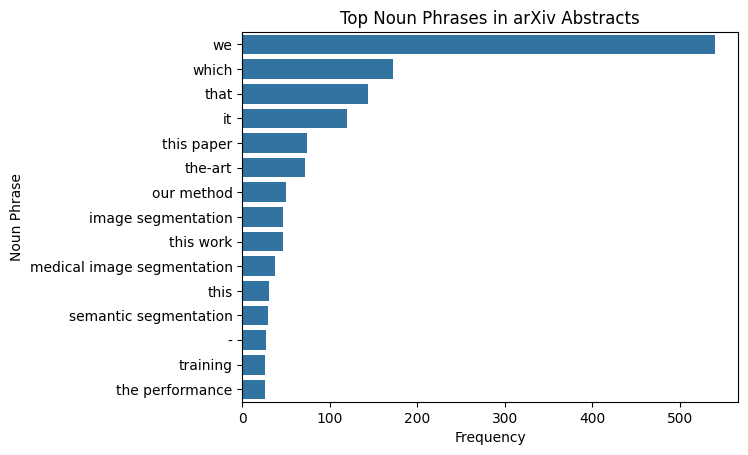

In [12]:
phrases, counts = zip(*top_nps)

plt.figure()
sns.barplot(x=list(counts), y=list(phrases))
plt.title("Top Noun Phrases in arXiv Abstracts")
plt.xlabel("Frequency")
plt.ylabel("Noun Phrase")
plt.show()


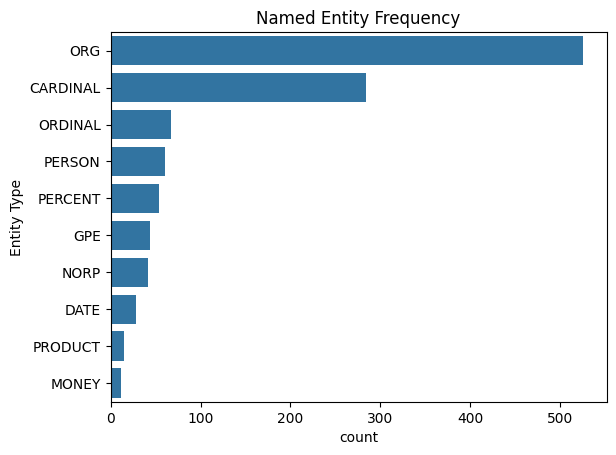

In [18]:
labels, values = zip(*entity_freq.most_common(10))

plt.figure()
sns.barplot(x=list(values), y=list(labels))
plt.title("Named Entity Frequency")
plt.xlabel("count")
plt.ylabel("Entity Type")
plt.show()
